导入模块

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder 


导入数据

In [4]:
data = pd.read_csv('data.csv')
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


数据清洗

In [6]:
data = data.drop(['Name','Cabin','Ticket'],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [8]:
data = data.dropna()

分类特征处理

In [9]:
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x)) # 'S' --> labels.index('S')

In [10]:
data = data.drop(columns=['PassengerId']) # 删除ID列

In [11]:
#data.loc[:,'Sex'] = (data.loc[:,'Sex'] == 'male').astype("int")
data["Sex"] = (data["Sex"]== "male").astype("int") 
#dummies_Sex = pd.get_dummies(data['Sex'], prefix= 'Sex')
#OneHotEncoder.fit_transform(data.loc['Sex'].reshape((0,1)))
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,29.699118,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [12]:
#data.loc[:,'Sex'].unique()

划分训练集

In [13]:
X = data.loc[:,data.columns!='Survived']
Y = data.loc[:,'Survived']


In [14]:
Xtest,Xtrain,Ytest,Ytrain = train_test_split(X,Y,test_size=0.7)
for i in [Xtest,Xtrain,Ytest,Ytrain]:
    i.index = range(i.shape[0])


建立模型

In [15]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7894736842105263

In [16]:
# 随机森林
clf = RandomForestClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7969924812030075

10折-交叉验证

In [32]:
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,X,Y,cv=10).mean()

score

0.7739274770173645

寻找最优max_depth

In [33]:
train = []
test = []
for i in range(10): # 这里是括号！括号！！！！！！！
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i + 1
                                ,criterion='entropy'
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_train = clf.score(Xtrain,Ytrain)
    score_test = cross_val_score(clf,X,Y,cv=10).mean()
    train.append(score_train) # 将数据合并
    test.append(score_test)
print(max(test))
print(train)
print(test)

0.8177860061287026
[0.7945425361155698, 0.7945425361155698, 0.8170144462279294, 0.8250401284109149, 0.8443017656500803, 0.8539325842696629, 0.8764044943820225, 0.8972712680577849, 0.9149277688603531, 0.9293739967897271]
[0.7862487231869254, 0.7682711950970378, 0.8166624106230849, 0.7998340143003065, 0.8110699693564862, 0.8144024514811031, 0.8177860061287026, 0.8042900919305414, 0.8087972420837589, 0.8009576098059243]


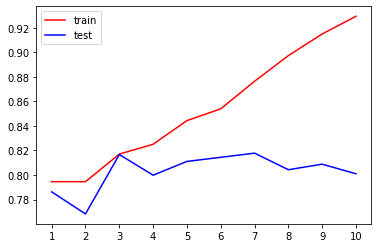

In [34]:
#fig,ax = plt.subplots(figsize=(12,6))
plt.plot(range(1,11),train,color="red",label="train")
plt.plot(range(1,11),test,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

网格搜索

In [35]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
                                                   0.3157894736842105,
                                                   0.3421052631578947,
                                                   0.3684210526315789,
                                                   0.39473684210526316,
                                                   0.42105263157894735,
                                                   0.4473684210526315,
                                                   0.47368421052631576, 0.5],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46],
                         'splitter': ('best', 'random')})

In [36]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 16,
 'splitter': 'random'}

In [37]:
GS.best_score_

0.8185867895545315

In [48]:


clf = DecisionTreeClassifier(random_state=25,
                            criterion= 'gini',
                            max_depth= 4,
                            min_impurity_decrease= 0.0,
                            min_samples_leaf=16,
                            splitter= 'random')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.8120300751879699

In [49]:
from sklearn.externals import joblib
joblib.dump(model,'music-recommender.joblib')


ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\externals\__init__.py)

In [38]:
#import numpy as np
#gini_threshold = np.linspace(0,0.5,50)
#
#parameters = {'criteron':('gini','entropy')
#             ,'splitter':('best','random')
#             ,'max_depth':[*range(1,10)]
#             ,'min_samples_leaf':[*range(1,50,5)]
#             ,'min_impurity_decresae':[*np.linspace(0,0.5,50)]
#}
#
#clf = DecisionTreeClassifier(random_state=25)
#GS = GridSearchCV(clf,parameters,cv=10)
#GS = GS.fit(Xtrain,Ytrain)
#
#GS.best_params_
#GS.best_socre_